## Scikit-learn Classification

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn
from sklearn import linear_model, cross_validation, metrics, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation  import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [5]:


flights = pd.read_csv('../data/nycflights13/flights.csv.gz')
weather = pd.read_csv('../data/nycflights13/weather.csv.gz')
airports = pd.read_csv('../data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year','month', 'day', 'hour', 'origin'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()


In [6]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01 01:00:00,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,10.0,2013-01-01 01:00:00,ORD,Chicago Ohare Intl,41.978603,-87.904842,668.0,-6.0,A,America/Chicago
10,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,...,10.0,2013-01-01 01:00:00,PBI,Palm Beach Intl,26.683161,-80.095589,19.0,-5.0,A,America/New_York
11,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,...,10.0,2013-01-01 01:00:00,TPA,Tampa Intl,27.975472,-82.533250,26.0,-5.0,A,America/New_York
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,...,10.0,2013-01-01 01:00:00,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,...,10.0,2013-01-01 01:00:00,SFO,San Francisco Intl,37.618972,-122.374889,13.0,-8.0,A,America/Los_Angeles
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,...,10.0,2013-01-01 01:00:00,DFW,Dallas Fort Worth Intl,32.896828,-97.037997,607.0,-6.0,A,America/Chicago


In [7]:

pred = 'dep_delay'
features =  ['month','day','dep_time','arr_time','carrier','dest','air_time','distance', 
             'lat', 'lon', 'alt',  'dewp', 'humid', 'wind_speed', 'wind_gust', 
             'precip', 'pressure', 'visib' ]

features_v = df[features]
pred_v = df[pred]

how_late_is_late = 15.0;

pd.options.mode.chained_assignment = None  # default='warn'


# carrier is not a number, so transform it into an number
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest is not a number, so transform it into a number
features_v['dest'] = pd.factorize(features_v['dest'])[0]

scaler = StandardScaler()
scaled_features_v = scaler.fit_transform(features_v)

features_train, features_test, pred_train, pred_test = train_test_split(
    scaled_features_v, pred_v, test_size=0.30, random_state=0)


### Doing the classification with Logistic Regression

We will first attempt to do classification with logistic regression.  This likely will not give us the best results because logistic regression is a linear model.


In [8]:
# Perform logistic regression for classification

clf_lr = sklearn.linear_model.LogisticRegression(penalty='l2', 
                                                 class_weight='balanced')
logistic_fit=clf_lr.fit(features_train, 
                        np.where(pred_train >= how_late_is_late,1,0))

predictions = clf_lr.predict(features_test)

In [9]:
# Summary Report

# Confusion Matrix
cm_lr = confusion_matrix(np.where(pred_test >= how_late_is_late,1,0), 
                         predictions)
print("Confusion matrix")
print(pd.DataFrame(cm_lr))

# Get accuracy
report_lr = precision_recall_fscore_support(
    list(np.where(pred_test >= how_late_is_late,1,0)), 
    list(predictions), average='binary')

#Print Accuracy
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f"
       % (report_lr[0], report_lr[1], report_lr[2],                                                                         
          accuracy_score(list(np.where(pred_test >= how_late_is_late,1,0)), 
                                                                                             list(predictions))))



Confusion matrix
       0      1
0  45206  21292
1   6095  11125

precision = 0.34, recall = 0.65, F1 = 0.45, accuracy = 0.67


An accuracy of 67% is not particularly good.  A bigger concern, however is the relatively low precision and F1 scores, which indicate that our model is better at predicting negatives (not late) than positives (late).  

However, predicting flight delays from the data we have is not easy. 

### Another Attempt: A Random Forest Classifier

The low precision should concern us. This indicates that potentially we are less able to predict flights that are actuallly late (which is more important) than those that are not late.  This is due to an unbalanced training set.

Perhaps a Random Forest Classifier could help us.  Let's try that.  We'll do 40 trees, and we'll scramble the input set of features (bagging) so that we'll get 40 different trees. Let's see what that does to our precision.




In [11]:
# Perform Random Forest Model for classification
# 40 Trees.

clf_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=40)
rf_fit=clf_rf.fit(features_train, 
                        np.where(pred_train >= how_late_is_late,1,0))

predictions_rf = clf_rf.predict(features_test)

In [12]:
# Summary Report

# Confusion Matrix
cm_rf = confusion_matrix(np.where(pred_test >= how_late_is_late,1,0), 
                         predictions_rf)
print("Confusion matrix")
print(pd.DataFrame(cm_rf))

# Get accuracy
report_rf = precision_recall_fscore_support(
    list(np.where(pred_test >= how_late_is_late,1,0)), 
    list(predictions_rf), average='binary')

#Print Accuracy
print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f"
       % (report_rf[0], report_rf[1], report_rf[2],                                                                         
          accuracy_score(list(np.where(pred_test >= how_late_is_late,1,0)), 
                                                                                             list(predictions))))




Confusion matrix
       0     1
0  65088  1410
1  10797  6423

precision = 0.82, recall = 0.37, F1 = 0.51, accuracy = 0.67


### Evaluating the Results

Our accuracy is about the same, but precision is now quite good at 82%. That's good.  But the low recall score should give us pause, and possibly tell us that we need to further tune our model.

### Feature Importances

Random forest classifiers can also tell us how important each feature is.  This is because we use different sets of input features for each of the 40 trees, and we can use this to evaluate which features appear to be the most predictive. 

Feature ranking:
1. feature 2: month (0.176842)
2. feature 3: day (0.131747)
3. feature 12: dep_time (0.075835)
4. feature 16: arr_time (0.074315)
5. feature 6: carrier (0.071833)
6. feature 11: dest (0.067866)
7. feature 7: air_time (0.048332)
8. feature 1: distance (0.047774)
9. feature 4: lat (0.040410)
10. feature 5: lon (0.038413)
11. feature 8: alt (0.036057)
12. feature 14: dewp (0.035703)
13. feature 13: humid (0.035248)
14. feature 0: wind_speed (0.034916)
15. feature 10: wind_gust (0.034452)
16. feature 9: precip (0.034400)
17. feature 17: pressure (0.010243)
18. feature 15: visib (0.005614)


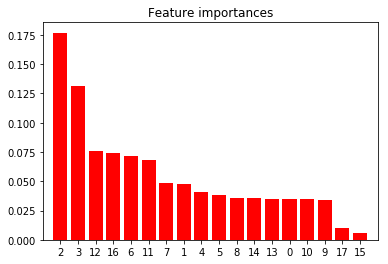

In [13]:
# Print the feature ranking
print("Feature ranking:")

indices = np.argsort(clf_rf.feature_importances_)[::-1]
std = np.std([clf_rf.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)

for f in range(features_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], features[f], clf_rf.feature_importances_[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features_train.shape[1]), clf_rf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features_train.shape[1]), indices)
plt.xlim([-1, features_train.shape[1]])
plt.show()

### Evaluating Feature Importances

What does the relative weight of feature importances say about
our dataset? Are there any features we might want to omit?
